In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def linear_regression_all_features(X, y, plot, x_label="", y_label=""):
    # Step 1 split the dataset into training and test sets(80,20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    lm = LinearRegression()
    # Step 2
    #fit the model
    lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)

    # The coefficient(s).
    coef = lm.coef_

    # The mean square error.
    MSE = np.mean(((predictions - y_test) ** 2))

    # Explained variance score (1 is perfect prediction).
    vs = lm.score(X_test, y_test)

    if plot:
        plt.figure(figsize=(4, 3))
        ax = plt.axes()
        ax.scatter(X_test, y_test, color='turquoise')
        ax.scatter(X_train, y_train, color='pink')
        ax.plot(X_test, predictions, color='black', linewidth=3)

        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)

        plt.show()
        
    return coef, MSE, vs

# Report the coefficients, mean squared error and variance score for the model on the test set

In [2]:
# Step 1 and Step 2 Output
data = load_boston()
X, y = data.data, data.target
coef, MSE, vs = linear_regression_all_features(X, y, False)
print("Coefficient:", coef)
print ("Mean squared error: %.2f" % MSE)
print ("Variance score: %.2f" % vs)

Coefficient: [-1.12241160e-01  6.18851654e-02  1.69236228e-02  3.31057053e+00
 -2.17012092e+01  3.74437883e+00 -5.79573689e-03 -1.70702714e+00
  2.89202004e-01 -1.17006172e-02 -9.48065547e-01  8.53879327e-03
 -4.90078381e-01]
Mean squared error: 22.63
Variance score: 0.70


# Report the coefficient, mean squared error and variance score for the model on the test set and 13 plots of the linear regression models generated on each feature

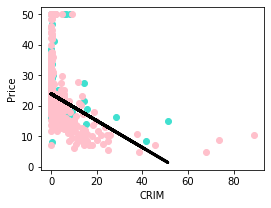

CRIM
Coefficient: [-0.4390441]
Mean squared error: 80.80
Variance score: 0.03




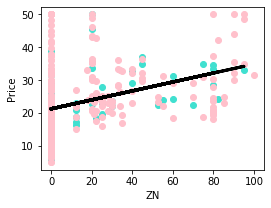

ZN
Coefficient: [0.13588277]
Mean squared error: 49.27
Variance score: 0.22




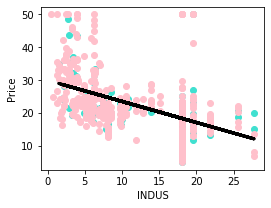

INDUS
Coefficient: [-0.64038778]
Mean squared error: 47.54
Variance score: 0.27




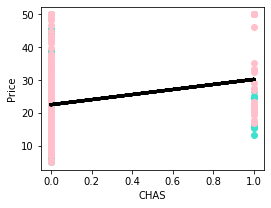

CHAS
Coefficient: [7.69023199]
Mean squared error: 85.72
Variance score: -0.10




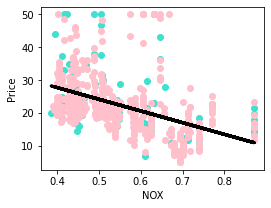

NOX
Coefficient: [-35.4375942]
Mean squared error: 88.82
Variance score: 0.10




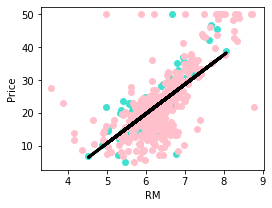

RM
Coefficient: [8.93689179]
Mean squared error: 30.42
Variance score: 0.58




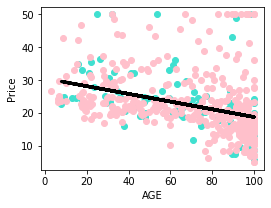

AGE
Coefficient: [-0.1169018]
Mean squared error: 66.39
Variance score: 0.19




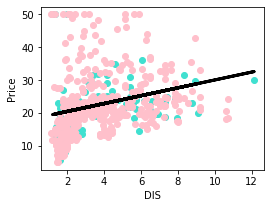

DIS
Coefficient: [1.19452222]
Mean squared error: 52.49
Variance score: 0.03




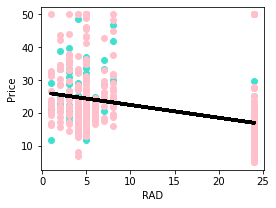

RAD
Coefficient: [-0.38762479]
Mean squared error: 56.26
Variance score: 0.20




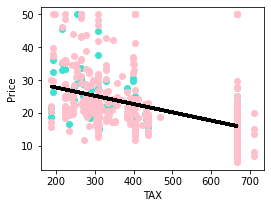

TAX
Coefficient: [-0.02501992]
Mean squared error: 45.16
Variance score: 0.33




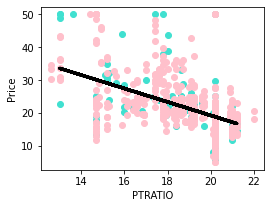

PTRATIO
Coefficient: [-2.04464556]
Mean squared error: 70.84
Variance score: 0.31




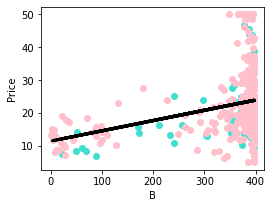

B
Coefficient: [0.03112865]
Mean squared error: 92.22
Variance score: 0.14




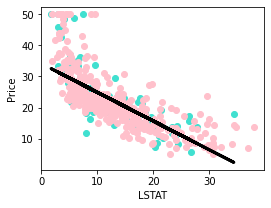

LSTAT
Coefficient: [-0.92225893]
Mean squared error: 48.73
Variance score: 0.54




In [3]:
# Step 3
def linear_regression_each_feature(df,plot):
    names = data.feature_names
    features = list(df.columns)
    coefs = []
    MSEs = []
    vss = []
    for col in df[features]:
        coef, MSE, vs = linear_regression_all_features(np.reshape(df[col].values, (-1, 1)), y, plot, names[col], 'Price' )
        coefs.append(coef)
        MSEs.append(MSE)
        vss.append(vs)
        print(names[col])
        print("Coefficient:", coef)
        print("Mean squared error: %.2f" % MSE)
        print("Variance score: %.2f" % vs)
        print("\n")
    return coefs, MSEs, vss

df = pd.DataFrame(X)
_,_,_ = linear_regression_each_feature(df, True)

In [4]:
# Step 4 Perform 10 iterations of Step 1, Step 2, and Step 3
sum_coefs = 0
sum_MSEs = 0
sum_vss = 0
for i in range(0, 10):
    coef, MSE, vs = linear_regression_all_features(X, y, False)
    sum_coefs += coef
    sum_MSEs += MSE
    sum_vss += vs
    
avg_coefs_all = sum_coefs / 10.0
avg_MSEs_all = sum_MSEs / 10.0
avg_vss_all = sum_vss / 10.0

print("average coefficient: " + str(avg_coefs_all)) 
print("average Mean square error: " + str(avg_MSEs_all))
print("average Variance score: " + str(avg_vss_all))

average coefficient: [-1.07711963e-01  4.64055441e-02  1.29488521e-02  3.09031782e+00
 -1.77612987e+01  3.62484899e+00  2.23022585e-03 -1.49096663e+00
  2.99264924e-01 -1.07942717e-02 -9.29543279e-01  9.87637055e-03
 -5.55499366e-01]
average Mean square error: 20.328327791570242
average Variance score: 0.7535063998516651


In [5]:
avg_coefs = [0.0] * 13
avg_MSEs = [0.0] * 13
avg_vss = [0.0] * 13
names = data.feature_names
for i in range(0, 10): 
    print("\nIteration " + str(i))
    df = pd.DataFrame(X)
    coef, MSE, vs = linear_regression_each_feature(df, False)
    for j in range(0, 13):
        avg_coefs[j] += coef[j] / 13.0
        avg_MSEs[j] += MSE[j] / 13.0
        avg_vss[j] += vs[j] / 13.0

print("\nAverages: ")
for k in range(0, 13):
    print("\n" + names[k])
    print("average coefficient: " + str(avg_coefs[k])) 
    print("average Mean square error: " + str(avg_MSEs[k]))
    print("average Variance score: " + str(avg_vss[k]))


Iteration 0
CRIM
Coefficient: [-0.36891375]
Mean squared error: 75.99
Variance score: 0.21


ZN
Coefficient: [0.13921563]
Mean squared error: 69.53
Variance score: 0.18


INDUS
Coefficient: [-0.65757171]
Mean squared error: 73.62
Variance score: 0.21


CHAS
Coefficient: [7.60254559]
Mean squared error: 68.18
Variance score: -0.05


NOX
Coefficient: [-34.62602971]
Mean squared error: 67.73
Variance score: 0.16


RM
Coefficient: [9.44399216]
Mean squared error: 49.72
Variance score: 0.36


AGE
Coefficient: [-0.120893]
Mean squared error: 72.92
Variance score: 0.18


DIS
Coefficient: [1.16280275]
Mean squared error: 73.75
Variance score: 0.03


RAD
Coefficient: [-0.39635705]
Mean squared error: 80.55
Variance score: 0.14


TAX
Coefficient: [-0.02438432]
Mean squared error: 68.90
Variance score: 0.27


PTRATIO
Coefficient: [-2.17122752]
Mean squared error: 68.23
Variance score: 0.24


B
Coefficient: [0.0356249]
Mean squared error: 89.42
Variance score: 0.07


LSTAT
Coefficient: [-0.961507

# To compare the model performance, provide 1. mean square error vs features and 2. variance score vs features

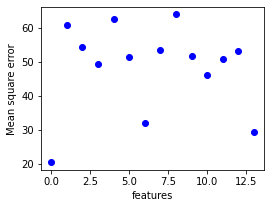

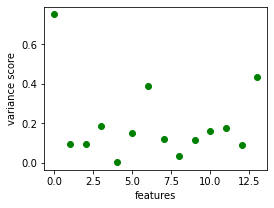

In [6]:
# provide the following plots: 1. mean square error vs features 2. variance score vs features
avg_coefs.insert(0, avg_coefs_all)
avg_MSEs.insert(0, avg_MSEs_all)
avg_vss.insert(0, avg_vss_all)

features = list(range(14))
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(features, avg_MSEs, color='blue')
ax.set_xlabel("features")
ax.set_ylabel("Mean square error")
plt.show()

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(features, avg_vss, color='green')
ax.set_xlabel("features")
ax.set_ylabel("variance score")
plt.show()

# Analysis

1. Based upon the linear models you generated, which feature appears to be most predictive for the target feature?

The LSTAT (% lower status of the population) appears to be most predictive for the target feature.


2. Suppose you need to select two features for a linear regression model to predict the target feature. Which two features would you select? Why?

I would select LSTAT (% lower status of the population) and RM (average number of rooms per dwelling) because they have the lowest mean square errors and highest variance scores.


3. Examine all the plots and numbers you have, do you have any comments on them? Do you find any surprising trends? Do you have any idea about what might be causing this surprising trend in the data? This is a descriptive question meant to encourage you to interpret your results and express yourself.

I find that the weighted distance to 5 Boston employment centres is negatively correlated to the housing price is surprising. The causing might be the employment centre has the most weight is in the area with low housing price.